In [1]:
using StatsBase
using Plots

In [2]:
function initialstate(L::Int)
    ρ = zeros(Bool,L,L)
    return ρ
end

function noiselayer(ρ::AbstractMatrix, p::Float64)
    L = size(ρ)[1]
    noise = rand(L,L) .< p
    return ρ .⊻ noise
end

function magnetization(ρ::AbstractMatrix)
    return mean(ρ)
end

magnetization (generic function with 1 method)

In [3]:
function measure(ρ::AbstractMatrix, q::Float64)
    vertical_checks = noiselayer(ρ .⊻ circshift(ρ,(-1,0)),q)
    horizontal_checks = noiselayer(ρ .⊻ circshift(ρ,(0,-1)),q)
    return vertical_checks, horizontal_checks
end

function toom(ρ::AbstractMatrix, checks::Tuple)
    vertical_checks, horizontal_checks = checks
    ρ = ρ .⊻ (vertical_checks .& horizontal_checks)
    return ρ
end

toom (generic function with 1 method)

In [38]:
# mags = Dict{Tuple{Int,Float64,Float64},Vector}()
# ZZ = Dict{Tuple{Int,Float64,Float64},Vector}()
# Zi = Dict{Tuple{Int,Float64,Float64},Vector}()
# Zj = Dict{Tuple{Int,Float64,Float64},Vector}()

Dict{Tuple{Int64, Float64, Float64}, Vector}()

In [80]:
p = 0.05
# q = 0.05
samples = 1000

t = time()

Ls = [4,8,12]

for q in 0.05:0.01:0.1
for L in Ls
    T = 1000L
    mags[(L,p,q)] = zeros(T)
    ZZ[(L,p,q)] = zeros(T)
    Zi[(L,p,q)] = zeros(T)
    Zj[(L,p,q)] = zeros(T)
    for _ in 1:samples
        ρs = zeros(Bool,T,L,L)
        ρs[1,:,:] = initialstate(L)

        for t in 2:T
            ρnew = noiselayer(ρs[t-1,:,:], p)
            ρs[t,:,:] = toom(ρnew, measure(ρnew, q))
        end
        mags[(L,p,q)] += [magnetization(ρs[t,:,:]) for t in 1:T]
        ZZ[(L,p,q)] += [ρs[t,1,1]*ρs[t,L÷2+1,1] for t in 1:T]
        Zi[(L,p,q)] += [ρs[t,1,1] for t in 1:T]
        Zj[(L,p,q)] += [ρs[t,L÷2+1,1] for t in 1:T]
    end
    mags[(L,p,q)] /= samples
    ZZ[(L,p,q)] /= samples
    Zi[(L,p,q)] /= samples
    Zj[(L,p,q)] /= samples
end
println(time()-t)
end


119.5066990852356
240.54269814491272
359.86033511161804
479.18880105018616
597.9723501205444
713.4052929878235


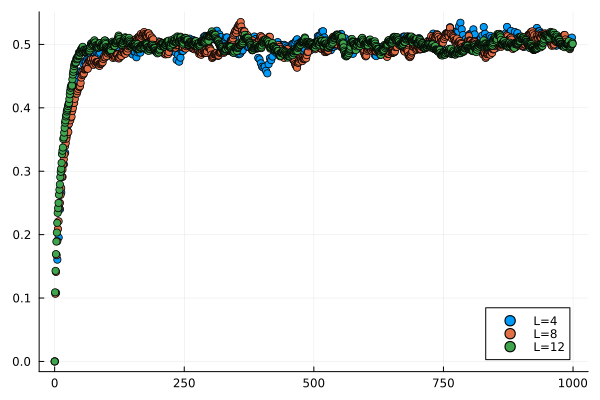

In [106]:
p = 0.05
q = 0.1

plt = plot()
for L in Ls
    T = 1000L
    xs = collect(1:10:T)/L
    ys = mags[(L,p,q)][1:10:end]
    plot!(plt, xs,ys, seriestype=:scatter, label="L=$L")
end
plt

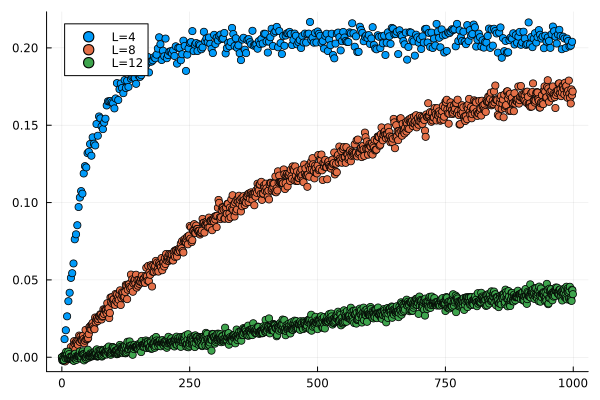

In [131]:
p = 0.05
q = 0.05

plt = plot()
for L in Ls
    T = 1000L
    xs = collect(1:10:T)/L
    ys = ZZ[(L,p,q)][1:10:end] - Zi[(L,p,q)][1:10:end] .* Zj[(L,p,q)][1:10:end]
    plot!(plt, xs, ys, seriestype=:scatter, label="L=$L")
end
plt

# p = 0.05
# qs = 0.05:0.01:0.1

# plt = plot()
# for q in qs[1:1]
#     xs = Ls
#     ys = [ZZ[(L,p,q)][end÷10] - Zi[(L,p,q)][end÷10] .* Zj[(L,p,q)][end÷10] for L in Ls]
#     plot!(plt, xs, log.(ys), seriestype=:scatter, label="q=$q")
# end
# plt

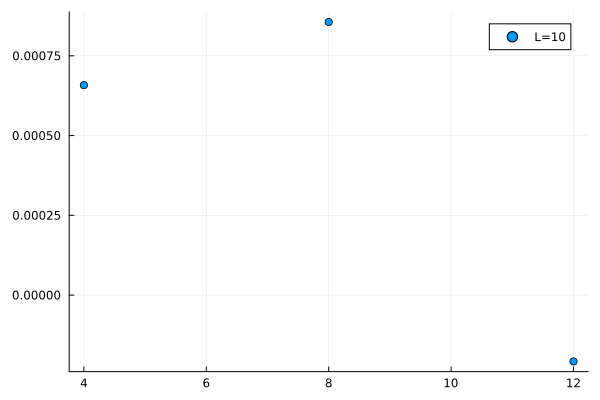

In [52]:
p = 0.05
q = 0.05

plt = plot()
for L in Ls
    T = 100L
    xs = collect(1:10:T)/L
    ys = ZZ[(L,p,q)][1:10:end] - Zi[(L,p,q)][1:10:end] .* Zj[(L,p,q)][1:10:end]
    plot!(plt, xs, ys, seriestype=:scatter, label="L=$L")
end
plt

p = 0.05
q = 0.05

plt = plot()
xs = Ls
ys = [ZZ[(L,p,q)][2] - Zi[(L,p,q)][2] .* Zj[(L,p,q)][2] for L in Ls]
plot!(plt, xs, ys, seriestype=:scatter, label="L=$L")
plt